<a href="https://colab.research.google.com/github/jpellicott/DLwP_FC/blob/main/DLwP_chapter_8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#next steps are go through and comment and then try on different datasets

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 47.9MB/s]
100% 543M/543M [00:07<00:00, 49.1MB/s]
100% 543M/543M [00:07<00:00, 75.5MB/s]
 98% 265M/271M [00:02<00:00, 96.7MB/s]
100% 271M/271M [00:02<00:00, 107MB/s] 


In [ ]:
!unzip -qq train.zip

In [ ]:
import os, shutil, pathlib
  
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")
 
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" 
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
  
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
  
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
  
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
import numpy as np 
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
     print(element.shape)
     if i >= 2:
         break
(16,)
(16,)
(16,)

(16,)
(16,)
(16,)


(16,)

In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break
(32, 16)
(32, 16)
(32, 16)

(32, 16)
(32, 16)
(32, 16)


(32, 16)

In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break
(4, 4)
(4, 4)
(4, 4)

(4, 4)
(4, 4)
(4, 4)


(4, 4)

In [ ]:
# for data_batch, labels_batch in train_dataset:
#     print("data batch shape:", data_batch.shape)
#     print("labels batch shape:", labels_batch.shape)
#     break
# data batch shape: (32, 180, 180, 3)
# labels batch shape: (32,)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 23s 154ms/step - loss: 0.7056 - accuracy: 0.5200 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 8s 114ms/step - loss: 0.7121 - accuracy: 0.5615 - val_loss: 0.6710 - val_accuracy: 0.5730
Epoch 3/30
63/63 [==============================] - 7s 107ms/step - loss: 0.6612 - accuracy: 0.6160 - val_loss: 0.6320 - val_accuracy: 0.6270
Epoch 4/30
63/63 [==============================] - 7s 107ms/step - loss: 0.6312 - accuracy: 0.6495 - val_loss: 0.6640 - val_accuracy: 0.6150
Epoch 5/30
63/63 [==============================] - 7s 107ms/step - loss: 0.5947 - accuracy: 0.6835 - val_loss: 0.6354 - val_accuracy: 0.6470
Epoch 6/30
63/63 [==============================] - 7s 107ms/step - loss: 0.5614 - accuracy: 0.7095 - val_loss: 0.7026 - val_accuracy: 0.6700
Epoch 7/30
63/63 [==============================] - 8s 120ms/step - loss: 0.5314 - accuracy: 0.7365 - val_loss: 0.6468 - val_accuracy: 0.6860
Epoch

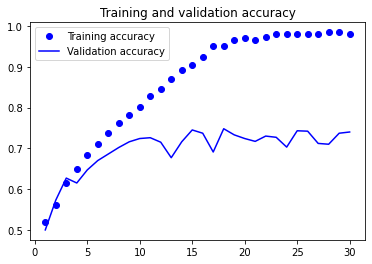

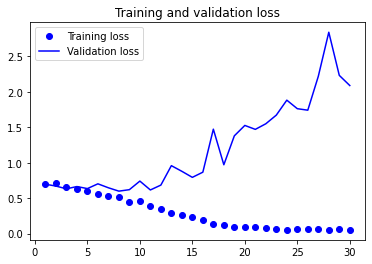

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 49ms/step - loss: 0.6375 - accuracy: 0.6945
Test accuracy: 0.695


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

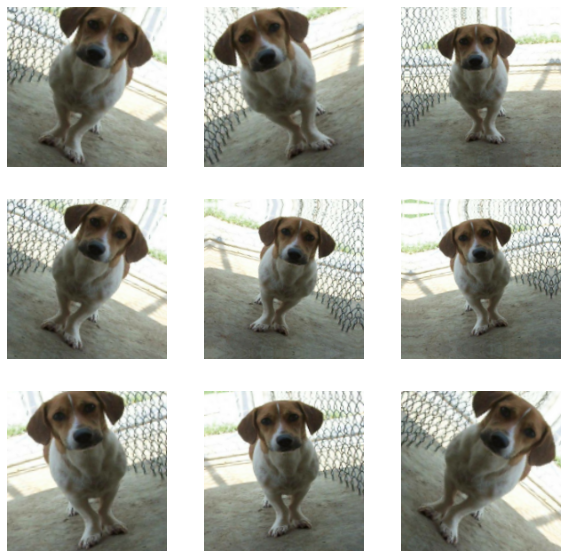

In [ ]:
plt.figure(figsize=(10, 10)) 
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 9s 116ms/step - loss: 0.7063 - accuracy: 0.5105 - val_loss: 0.6911 - val_accuracy: 0.5020
Epoch 2/100
63/63 [==============================] - 7s 114ms/step - loss: 0.7356 - accuracy: 0.5425 - val_loss: 0.6908 - val_accuracy: 0.5760
Epoch 3/100
63/63 [==============================] - 7s 113ms/step - loss: 0.6829 - accuracy: 0.5890 - val_loss: 0.6661 - val_accuracy: 0.6140
Epoch 4/100
63/63 [==============================] - 7s 113ms/step - loss: 0.6725 - accuracy: 0.6105 - val_loss: 0.7700 - val_accuracy: 0.5250
Epoch 5/100
63/63 [==============================] - 7s 114ms/step - loss: 0.6720 - accuracy: 0.6160 - val_loss: 0.6309 - val_accuracy: 0.6120
Epoch 6/100
63/63 [==============================] - 7s 114ms/step - loss: 0.6385 - accuracy: 0.6630 - val_loss: 0.6457 - val_accuracy: 0.5980
Epoch 7/100
63/63 [==============================] - 8s 114ms/step - loss: 0.6159 - accuracy: 0.6660 - val_loss: 0.6281 - val_accuracy: 0.6380

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 51ms/step - loss: 0.4895 - accuracy: 0.8410
Test accuracy: 0.841


In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 51ms/step - loss: 0.4895 - accuracy: 0.8410
Test accuracy: 0.841


In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
import numpy as np
  
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
  
train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
  
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 17.6521 - accuracy: 0.9230 - val_loss: 3.0020 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 3.4572 - accuracy: 0.9745 - val_loss: 14.8067 - val_accuracy: 0.9320
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.5170 - accuracy: 0.9875 - val_loss: 4.4806 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8544 - accuracy: 0.9920 - val_loss: 5.3342 - val_accuracy: 0.9690
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.1455 - accuracy: 0.9925 - val_loss: 5.0853 - val_accuracy: 0.9690
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.5524 - accuracy: 0.9940 - val_loss: 7.2414 - val_accuracy: 0.9660
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9776 - accuracy: 0.9940 - val_loss: 5.2311 - val_accuracy: 0.9710
Epoch 8/20
63/63 

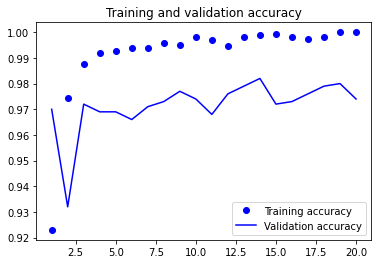

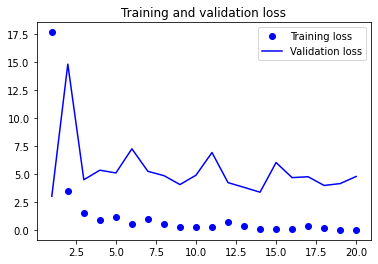

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
>>> conv_base.trainable = True
>>> print("This is the number of trainable weights " 
          "before freezing the conv base:", len(conv_base.trainable_weights))
This is the number of trainable weights before freezing the conv base: 26 
>>> conv_base.trainable = False
>>> print("This is the number of trainable weights " 
          "after freezing the conv base:", len(conv_base.trainable_weights))
This is the number of trainable weights after freezing the conv base: 0

SyntaxError: ignored

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
  
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 22s 318ms/step - loss: 18.4018 - accuracy: 0.8955 - val_loss: 5.6577 - val_accuracy: 0.9580
Epoch 2/50
63/63 [==============================] - 20s 306ms/step - loss: 7.2766 - accuracy: 0.9450 - val_loss: 5.0457 - val_accuracy: 0.9660
Epoch 3/50
63/63 [==============================] - 19s 300ms/step - loss: 5.6329 - accuracy: 0.9515 - val_loss: 4.2252 - val_accuracy: 0.9730
Epoch 4/50
63/63 [==============================] - 19s 298ms/step - loss: 5.1246 - accuracy: 0.9590 - val_loss: 4.5190 - val_accuracy: 0.9710
Epoch 5/50
63/63 [==============================] - 19s 301ms/step - loss: 4.6845 - accuracy: 0.9580 - val_loss: 4.0552 - val_accuracy: 0.9750
Epoch 6/50
63/63 [==============================] - 19s 298ms/step - loss: 4.0743 - accuracy: 0.9650 - val_loss: 4.8829 - val_accuracy: 0.9750
Epoch 7/50
63/63 [==============================] - 19s 296ms/step - loss: 3.5780 - accuracy: 0.9670 - val_loss: 4.3372 - val_accuracy: 0.978

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 13s 188ms/step - loss: 2.2415 - accuracy: 0.9735
Test accuracy: 0.974


In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])
  
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 23s 335ms/step - loss: 0.3501 - accuracy: 0.9875 - val_loss: 1.6095 - val_accuracy: 0.9850
Epoch 2/30
63/63 [==============================] - 21s 324ms/step - loss: 0.5478 - accuracy: 0.9890 - val_loss: 2.4733 - val_accuracy: 0.9730
Epoch 3/30
63/63 [==============================] - 21s 324ms/step - loss: 0.2203 - accuracy: 0.9905 - val_loss: 1.9022 - val_accuracy: 0.9780
Epoch 4/30
63/63 [==============================] - 21s 324ms/step - loss: 0.3857 - accuracy: 0.9910 - val_loss: 1.6209 - val_accuracy: 0.9830
Epoch 5/30
63/63 [==============================] - 21s 325ms/step - loss: 0.2759 - accuracy: 0.9920 - val_loss: 1.9268 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 21s 324ms/step - loss: 0.2283 - accuracy: 0.9935 - val_loss: 2.0512 - val_accuracy: 0.9820
Epoch 7/30
63/63 [==============================] - 21s 324ms/step - loss: 0.1441 - accuracy: 0.9960 - val_loss: 2.0177 - val_accuracy: 0.9840

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 12s 189ms/step - loss: 1.8591 - accuracy: 0.9810
Test accuracy: 0.981
